In [12]:
NARR_temp_data <- read.csv(file='../data/NOAA_NARR_weather_data/california_air_sfc_2015_one_hour.csv', header=TRUE, sep=",")

In [13]:
head(NARR_temp_data, n=10)

time,air,lat,lon
<fct>,<dbl>,<dbl>,<dbl>
2015-03-23 18:00:00,285.8574,40.29749,-124.3408
2015-03-23 18:00:00,289.3574,38.96153,-123.5579
2015-03-23 18:00:00,290.1074,39.24150,-123.6393
2015-03-23 18:00:00,290.1074,39.52163,-123.7215
2015-03-23 18:00:00,286.4199,39.80193,-123.8045
2015-03-23 18:00:00,285.9824,40.08238,-123.8883
2015-03-23 18:00:00,287.1699,40.36298,-123.9729
2015-03-23 18:00:00,281.2949,40.64372,-124.0584
2015-03-23 18:00:00,291.7324,38.18395,-122.9628


In [14]:
library(akima)
library(ggplot2)

lat_start <- 32.52
lon_start <- -124.48
lat_end <- 42.0
lon_end <- -114.131

gridint <- 500

In [40]:
gridded_data <- with(NARR_temp_data, interp(x = lon, y = lat, z = air, linear = TRUE, extrap = TRUE,
                      xo=seq(lon_start, lon_end, length=gridint), 
                      yo=seq(lat_start, lat_end, length=gridint)))

gridded_data <- as.data.frame(interp2xyz(gridded_data))

In [41]:
head(gridded_data, n=10)

x,y,z
<dbl>,<dbl>,<dbl>
-124.4800,32.52,NA
-124.4593,32.52,NA
-124.4385,32.52,NA
-124.4178,32.52,NA
-124.3970,32.52,NA
-124.3763,32.52,NA
-124.3556,32.52,NA
-124.3348,32.52,NA
-124.3141,32.52,NA


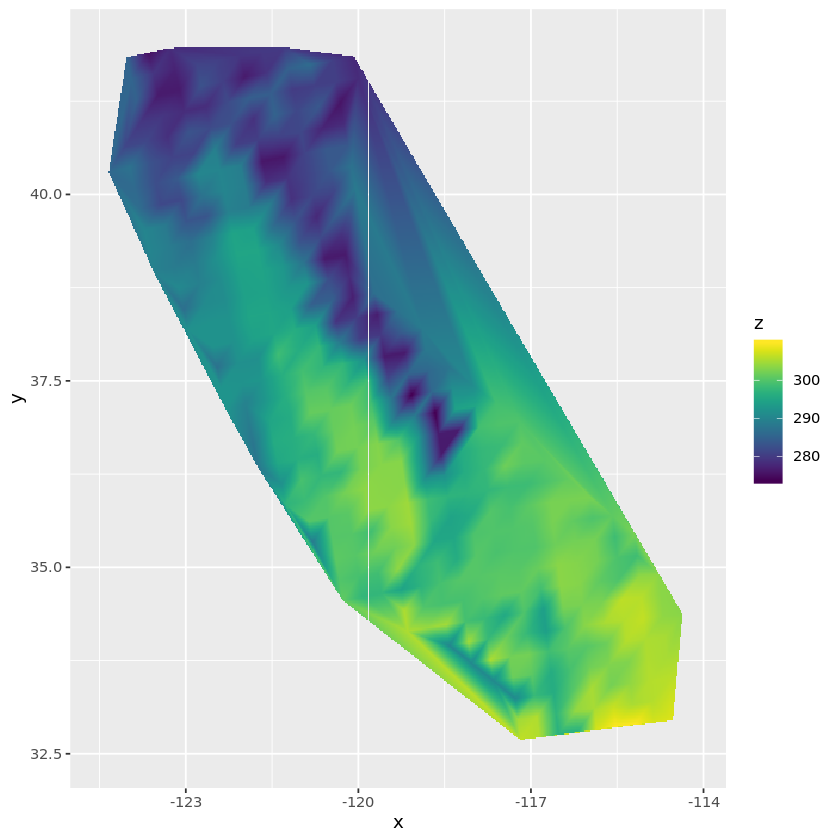

In [42]:
library(viridis)

world_df <- map_data("world")

ggplot(gridded_data, aes(x = x, y = y, fill = z)) + 
    geom_tile() + 
    scale_fill_viridis(na.value = "transparent")